![example](images/director_shot.jpeg)

# Microsoft-Movie-Analysis

**Authors:** Christopher Varghese
***

## Overview

This analysis will use data samples to study the correlation between movie genre and revenue, ratings, and profitability to help give insight to Microsoft's new movie studio in their endeavor to compete in this industry. By approaching the movie industry from the various angles by which movies are deemed to be success, this analysis presents some insight on which genres to pursue and how to go about them. By analyzing revenue and probability of profitability, this analysis strives to ensure that this new movie studio is generating a positive revenue rather than a deficit. Additionally, by exploring the impact of ratings and its correlation to genre, it will be easier for this movie studio to create a impactful, global reputation as a premier film making service.

## Business Problem

Creating a movie can be a very risky investment, especially with little knowledge of the statistics of the industry. Since movies are heavily time and capital consuming, it is of utmost importance to carefully plan out business strategies in order to be successful. Questions such as, "What genres create the most revenue and have the highest probability of generating profit?" and "Which genres will be best to accumulate the most and highest ratings?" are relevant to this analysis and for the success of the Microsoft Movie Studio.

## Data Understanding

In [240]:
# Import standard packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [241]:
#import data sets
df_imdb_titles = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
df_tn_movie_budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

## IMDb Data

This data is pulled from IMDb's various datasets. There are four datasets that we are looking at which include the movie titles, ratings, crew members, and names for all crew members used. The first three data sets are linked by the alphanumeric code given for each unique movie title and the fourth data set will be used to find the names corrosponding to the aphanumeric code used for directors and writers of these films.

In [275]:
#take a quick look at a few of our data sets
df_imdb_titles.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [243]:
df_imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## TN Data

This data includes movie titles, dates, and most importantly, the production budget, domestic gross, and international gross. This is essential for analzying the financial side of these movies.

In [246]:
df_tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

### Data Cleaning

For the various data sets, I dropped unecessary column names as well converted some of the data types into workable dtypes.

In [248]:
#drop unecessary columns
df_imdb_titles.drop(columns = ['original_title', 'runtime_minutes'], inplace = True)
df_tn_movie_budget.drop(columns = ['release_date'], inplace = True)

In [251]:
#remove commas and dollar signs from columns of tn movie budget data set
df_tn_movie_budget['production_budget'] = df_tn_movie_budget['production_budget'].str.replace(',','').str.replace('$','')
df_tn_movie_budget['domestic_gross'] = df_tn_movie_budget['domestic_gross'].str.replace(',','').str.replace('$','')
df_tn_movie_budget['worldwide_gross'] = df_tn_movie_budget['worldwide_gross'].str.replace(',','').str.replace('$','')

In [252]:
#change columns from string to integers
df_tn_movie_budget['production_budget'] = df_tn_movie_budget['production_budget'].astype(np.int64)
df_tn_movie_budget['domestic_gross'] = df_tn_movie_budget['domestic_gross'].astype(np.int64)
df_tn_movie_budget['worldwide_gross'] = df_tn_movie_budget['worldwide_gross'].astype(np.int64)

In [253]:
df_tn_movie_budget.head()

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [254]:
df_tn_movie_budget.dtypes

id                    int64
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

### Merge Datasets

I first merged the imdb datasets together using the alphanumeric code which is given for each movie title. I then merged the imdb dataset with the tn movie budget dataset to connect these sets together.

In [255]:
#merge imdb sets together
df_imdb_merged = pd.merge(df_imdb_titles, df_imdb_ratings, on = ['tconst'], how = 'left')
df_imdb_merged.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0


In [256]:
#merge imdb dataset with tn movie budgets data set
df_imdb_merged = df_imdb_merged.rename(columns = {'primary_title' : 'movie'})
movies_df = pd.merge(df_imdb_merged, df_tn_movie_budget, on = ['movie'], how = 'right')
movies_df.head()

,tconst,movie,start_year,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012.0,"Action,Animation,Comedy",1.9,8248.0,26,45000000,0,73706
1,tt0293429,Mortal Kombat,2021.0,"Action,Adventure,Fantasy",NaN,NaN,10,20000000,70433227,122133227
2,tt0326592,The Overnight,2010.0,NaN,7.5,24.0,21,200000,1109808,1165996
3,tt3844362,The Overnight,2015.0,"Comedy,Mystery",6.1,14828.0,21,200000,1109808,1165996
4,tt0337692,On the Road,2012.0,"Adventure,Drama,Romance",6.1,37886.0,17,25000000,720828,9313302


### Feature Engineering

I created 3 new columns: the total gross amount, the revenue(gross - budget), and a revenue budget ratio(revenue / budget)
I also created another data set which has multiple entries per movie to account for the many-to-many relationship between movies and genres

In [257]:
movies_df['total_gross'] = (movies_df['worldwide_gross'] + movies_df['domestic_gross'])
movies_df['revenue'] = ((movies_df['domestic_gross'] 
                                  + movies_df['worldwide_gross']) 
                                  - movies_df['production_budget'])
movies_df['revenue_budget_ratio'] = (movies_df['revenue'] / movies_df['production_budget'])
movies_df.head(20)

,tconst,movie,start_year,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_gross,revenue,revenue_budget_ratio
0,tt0249516,Foodfight!,2012.0,"Action,Animation,Comedy",1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362
1,tt0293429,Mortal Kombat,2021.0,"Action,Adventure,Fantasy",NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323
2,tt0326592,The Overnight,2010.0,NaN,7.5,24.0,21,200000,1109808,1165996,2275804,2075804,10.379020
3,tt3844362,The Overnight,2015.0,"Comedy,Mystery",6.1,14828.0,21,200000,1109808,1165996,2275804,2075804,10.379020
4,tt0337692,On the Road,2012.0,"Adventure,Drama,Romance",6.1,37886.0,17,25000000,720828,9313302,10034130,-14965870,-0.598635
5,tt2404548,On the Road,2011.0,Drama,NaN,NaN,17,25000000,720828,9313302,10034130,-14965870,-0.598635
6,tt3872966,On the Road,2013.0,Documentary,NaN,NaN,17,25000000,720828,9313302,10034130,-14965870,-0.598635
7,tt4339118,On the Road,2014.0,Drama,6.0,6.0,17,25000000,720828,9313302,10034130,-14965870,-0.598635
8,tt5389486,On the Road,2015.0,Documentary,NaN,NaN,17,25000000,720828,9313302,10034130,-14965870,-0.598635
9,tt5647250,On the Road,2016.0,Drama,5.7,127.0,17,25000000,720828,9313302,10034130,-14965870,-0.598635


In [258]:
#create an separate entry for every genre since one movie can have multiple genres
genres_col = movies_df['genres'].str.split(',').apply(Series, 1).stack()
genres_col.index = genres_col.index.droplevel(-1)
genres_col.name = 'genres'
genres_df = movies_df.drop(columns = ['genres'])
genres_df = genres_df.join(genres_col)
genres_df.head()

,tconst,movie,start_year,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_gross,revenue,revenue_budget_ratio,genres
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Action
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Animation
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Comedy
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Action
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Adventure


## Analysis

### Genres
Genres are a very important category of movies since individuals have prefrences for different genres. Additionally, each genre may have varying budgets, ratings, revenue, etc.

#### Genres by Rating
This table helps shed light on the varying ratings per genre

In [259]:
genres_df[['genres','averagerating']].groupby(['genres']).agg(['count', 'median', 'mean'])

averagerating                 
                    count median      mean
genres                                    
Action                630   6.30  6.103810
Adventure             448   6.50  6.400893
Animation             130   6.70  6.482308
Biography             195   7.10  6.971795
Comedy                758   6.30  6.186280
Crime                 362   6.40  6.255801
Documentary           204   7.20  7.171569
Drama                1491   6.50  6.437022
Family                144   6.30  6.200000
Fantasy               175   6.20  6.002857
History                71   7.10  6.829577
Horror                360   5.50  5.370556
Music                  72   6.40  6.483333
Musical                22   6.45  6.468182
Mystery               223   6.20  6.006726
News                    3   7.00  6.800000
Reality-TV              0    NaN       NaN
Romance               326   6.30  6.274233
Sci-Fi                204   6.30  6.145098
Sport                  62   6.80  6.591935
Thriller              509   6.00  5.855010
War                    39   6.30  6.438462
Western                16   6.50  6.387500

#### Genre by Revenue
This table helps show the varying revenues by genre

In [260]:
genres_df[['genres','revenue']].groupby(['genres']).agg(['count', 'median', 'mean'])

revenue                           
              count       median          mean
genres                                        
Action          710   62594186.0  1.803859e+08
Adventure       490  120683100.5  2.967294e+08
Animation       148  223370250.5  3.310240e+08
Biography       248   17918529.5  7.677517e+07
Comedy          842   39251638.5  1.157770e+08
Crime           398   13930033.0  6.660121e+07
Documentary     499    9433656.0  6.823288e+07
Drama          1817   11452376.0  6.403517e+07
Family          204   52352171.0  1.755333e+08
Fantasy         202   77374883.5  2.309826e+08
History          96   13950208.0  7.476964e+07
Horror          415   17651867.0  7.222635e+07
Music            87   17996452.0  8.022531e+07
Musical          35   54163316.0  2.823923e+08
Mystery         249   24601843.0  7.704694e+07
News              7   41461156.0  3.841427e+07
Reality-TV        1   -1000000.0 -1.000000e+06
Romance         372   15589223.0  6.763229e+07
Sci-Fi          229   51683802.0  2.419119e+08
Sport            75   15797800.0  8.048867e+07
Thriller        594   16776929.0  8.090673e+07
War              53    4399722.0  5.272073e+07
Western          25   -1000000.0  5.357582e+07

#### Genre by Budget
This table displays the varying budgets per Genre

In [272]:
genres_df[['genres','production_budget']].groupby(['genres']).agg(['count', 'median', 'mean'])

production_budget                        
                        count    median          mean
genres                                               
Action                    710  38000000  6.211357e+07
Adventure                 490  73621553  8.722477e+07
Animation                 148  74500000  8.039302e+07
Biography                 248  18000000  2.513401e+07
Comedy                    842  20000000  3.303495e+07
Crime                     398  20000000  2.726702e+07
Documentary               499  12000000  2.519590e+07
Drama                    1817  13000000  2.361329e+07
Family                    204  20000000  4.708113e+07
Fantasy                   202  41000000  6.591755e+07
History                    96  19000000  3.337667e+07
Horror                    415   8000000  1.879702e+07
Music                      87  12000000  1.592897e+07
Musical                    35  14000000  3.939112e+07
Mystery                   249  12000000  2.256773e+07
News                        7  22000000  3.497143e+07
Reality-TV                  1   1000000  1.000000e+06
Romance                   372  12500000  2.047887e+07
Sci-Fi                    229  30000000  6.428107e+07
Sport                      75  15000000  2.473500e+07
Thriller                  594  15000000  2.696671e+07
War                        53  15000000  2.388679e+07
Western                    25  18000000  3.738200e+07

In [262]:
genres_df.head()

,tconst,movie,start_year,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_gross,revenue,revenue_budget_ratio,genres
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Action
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Animation
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Comedy
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Action
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Adventure


### Genre vs Profit

Now that we have some understanding of how profit varies by genre, this graph gives actionable insight into the correlation between profit and genre. By taking the average revenue and categorzing it by the genre, it helps to show which genres will yield the most profit. This is important for a budding movie studio since generating capital is a primary focus for the business.

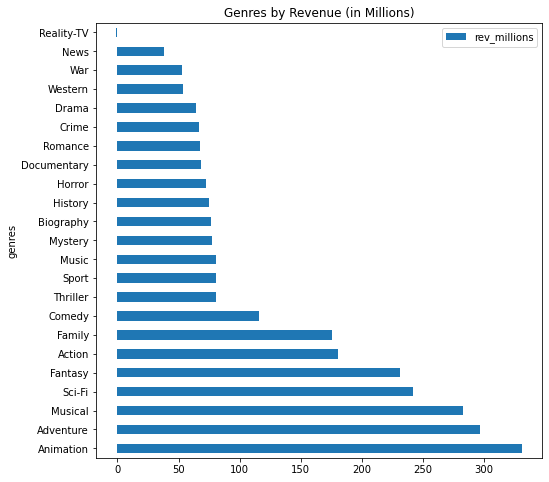

In [286]:
#Create horizontal bar plot
genres_by_revenue = genres_df[['movie','revenue','genres']]
#Check for null
genres_by_revenue.loc[genres_by_revenue['genres'] == 'News']
genres_by_revenue = genres_by_revenue.groupby(['genres']).mean()
#Reduce Revenue into Millions for simplification
genres_by_revenue['rev_millions'] = genres_by_revenue['revenue'] / 1000000
del genres_by_revenue['revenue']
genres_by_revenue.sort_values('rev_millions', ascending = False, inplace = True)
genres_by_revenue.head(10)
genres_by_revenue[['rev_millions']].plot.barh(stacked=True, title = 'Genres by Revenue (in Millions)', figsize=(8, 8))
plt.savefig("./images/genres_revenue.png", dpi=150)

In [264]:
genres_df.head()

,tconst,movie,start_year,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_gross,revenue,revenue_budget_ratio,genres
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Action
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Animation
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Comedy
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Action
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Adventure


### Genres vs Ratings

Understanding the relationship between genres and ratings required multiple graphings. In the first graph, since the average ratings were so close by genre, the visual was helpful but was not insightful enough to make any reccomendations. In the second graph, by tallying the amount of ratings that were above average(near the averages of the first graph) I was able to better depict how certain genres recieve better reviews. Although the genres that are the most profitable and most highly rated do not align, it is important to consider both as high ratings for a studio will likely generate viewership for all media created by that studio.

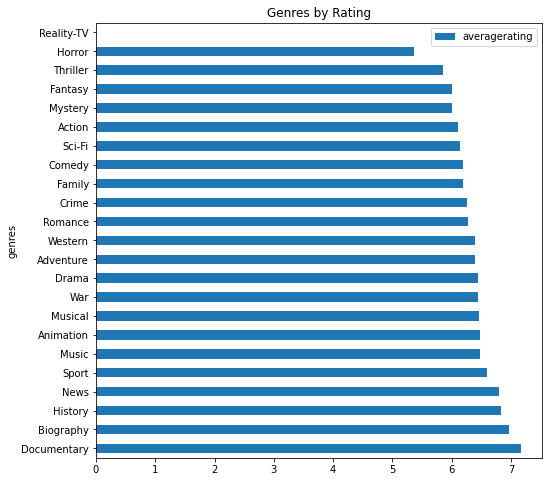

In [287]:
#Create Horizontal Bar Plot to display average rating by genre
genres_by_rating = genres_df[['movie','genres','averagerating']]
genres_by_rating = genres_by_rating.groupby(['genres']).mean()
genres_by_rating.sort_values('averagerating', ascending = False, inplace = True)
genres_by_rating[['averagerating']].plot.barh(stacked=True, title = 'Genres by Rating', figsize=(8, 8))
plt.savefig("./images/genres_by_rating.png", dpi=150)

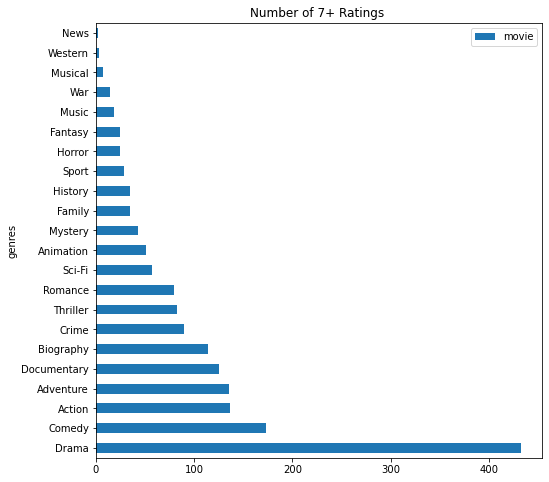

In [284]:
#horizontal bar plot to show how many 7+ rating a genre has
genres_with_good_ratings = genres_df[genres_df['averagerating'] >= 7]
genres_with_good_ratings = (pd.DataFrame(genres_with_good_ratings.groupby('genres')
                                         .movie.nunique())).sort_values('movie', ascending=False)
genres_with_good_ratings[['movie']].plot.barh(stacked=True, title = 'Number of 7+ Ratings ', figsize=(8, 8));
plt.savefig("./images/genres_7_ratings.png", dpi=150)

### Probability of Profitability

This analysis takes a deeper look into the individual genres and determines what percentages of the movies are highly profitable to a loss. This bar chart helps to almost determine a probability of success since it showcases how many of the movies flopped, did okay, and did extremely well.

In [208]:
#This function considers a movies ration of revenue to budget and determines how profitable it is by a scale of
#10x, 5x, 2x, Break Even, or Loss
def revenue_score_type(rev_ratio):
    if (rev_ratio) >= 10:
        return '10x'
    elif (rev_ratio) >= 5:
        return '5x'
    elif (rev_ratio) >= 2:
        return '2x'
    elif (rev_ratio) >= 1:
        return 'Break Even'
    else:
        return 'Loss'

In [214]:
genres_df['profitability'] = genres_df['revenue_budget_ratio'].apply(revenue_score_type)
genres_df.head()

,tconst,movie,start_year,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_gross,revenue,revenue_budget_ratio,genres,Profitability,profitability
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Action,Loss,Loss
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Animation,Loss,Loss
0,tt0249516,Foodfight!,2012.0,1.9,8248.0,26,45000000,0,73706,73706,-44926294,-0.998362,Comedy,Loss,Loss
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Action,5x,5x
1,tt0293429,Mortal Kombat,2021.0,NaN,NaN,10,20000000,70433227,122133227,192566454,172566454,8.628323,Adventure,5x,5x


In [217]:
#genres_df['start_year'] = pd.to_datetime(genres_df['start_year'])
#genres_df.head(20)
profitability_by_genre = pd.crosstab(genres_df['profitability'], genres_df['genres'], normalize = 'columns')
profitability_by_genre

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
profitability,,,,,,,,,,,,,,,,,,,,,
10x,0.061972,0.061224,0.128378,0.100806,0.102138,0.042714,0.110220,0.102917,0.137255,0.153465,...,0.228571,0.172691,0.000000,0.0,0.118280,0.104803,0.080000,0.106061,0.056604,0.04
2x,0.256338,0.332653,0.331081,0.193548,0.242280,0.203518,0.156313,0.162906,0.235294,0.217822,...,0.085714,0.156627,0.285714,0.0,0.204301,0.218341,0.186667,0.183502,0.245283,0.12
5x,0.102817,0.134694,0.175676,0.129032,0.137767,0.097990,0.096192,0.110072,0.117647,0.103960,...,0.257143,0.148594,0.000000,0.0,0.142473,0.161572,0.093333,0.106061,0.075472,0.08
Break Even,0.154930,0.136735,0.121622,0.112903,0.136580,0.128141,0.120240,0.121629,0.107843,0.148515,...,0.028571,0.072289,0.142857,0.0,0.112903,0.082969,0.133333,0.101010,0.075472,0.12
Loss,0.423944,0.334694,0.243243,0.463710,0.381235,0.527638,0.517034,0.502477,0.401961,0.376238,...,0.400000,0.449799,0.571429,1.0,0.422043,0.432314,0.506667,0.503367,0.547170,0.64


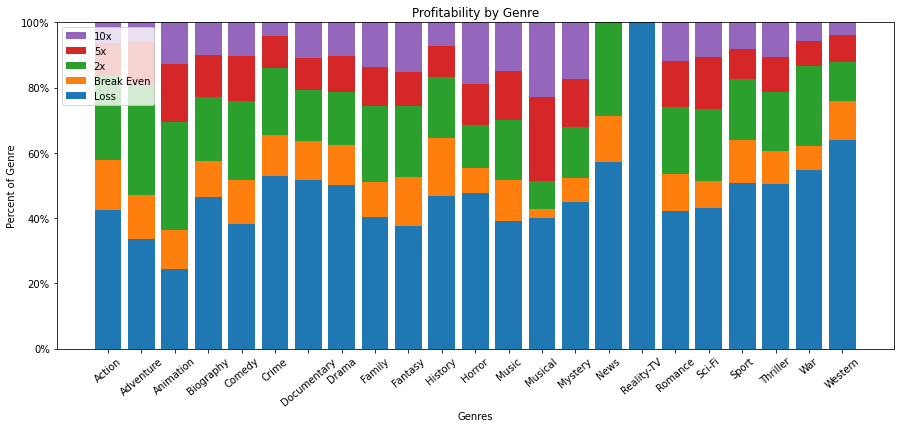

In [282]:
import matplotlib.ticker as mtick

profitability_by_genre_fig, profitability_by_genre_ax = plt.subplots(figsize=(15, 6))

profitability_by_genre_ax.set_title('Profitability by Genre')
profitability_by_genre_ax.set_ylabel('Percent of Genre')
profitability_by_genre_ax.set_xlabel('Genres')

profitability = profitability_by_genre.columns
profitability_10x = profitability_by_genre.loc['10x']*100
profitability_5x = profitability_by_genre.loc['5x']*100
profitability_2x = profitability_by_genre.loc['2x']*100
profitability_break_even = profitability_by_genre.loc['Break Even']*100
profitability_loss = profitability_by_genre.loc['Loss']*100

prof_loss_plt = profitability_by_genre_ax.bar(profitability, profitability_loss)
prof_break_even_plt = profitability_by_genre_ax.bar(profitability, profitability_break_even, 
                                                    bottom = profitability_loss)
prof_2x_plt = profitability_by_genre_ax.bar(profitability, profitability_2x, 
                                            bottom = profitability_loss + profitability_break_even)
prof_5x_plt = profitability_by_genre_ax.bar(profitability, profitability_5x, 
                                            bottom = profitability_loss + profitability_break_even 
                                            + profitability_2x)
prof_10x_plt = profitability_by_genre_ax.bar(profitability, profitability_10x,
                                            bottom = profitability_loss + profitability_break_even 
                                            + profitability_2x + profitability_5x)

profitability_by_genre_ax.tick_params(axis = 'x', rotation = 40)


profitability_by_genre_ax.legend([prof_10x_plt, 
                                  prof_5x_plt, 
                                  prof_2x_plt, 
                                  prof_break_even_plt, 
                                  prof_loss_plt], 
                                 ['10x', '5x', '2x', 'Break Even', 'Loss'], loc = 'upper left')
profitability_by_genre_ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("./images/profitability.png", dpi=150)
plt.show()

![](images/profitability.png)

## Conclusions
My analysis leaves 3 main considerations for Microsoft's Movie Studio to consider.

**Microsoft should focus on creating titles in Animation, Adventure, and Musicals to yield the highest profits.** The top 5 most profitable genres on average are Animation, Adventure, Musical, Sci-Fi, and Fantasy. By focusing on at least the top 3 of these genres, Microsoft has a very high chance of at least recouping their initial investments as well as generating capital to expanding their studio and its productions.

**Microsoft should focus on creating titles in Drama and Comedy to ensure high ratings.** While the quality of a production will correlate to its ratings, the statistics show that drama and comedy rake in the highest ratings by far. By exploring these genres, Microsoft is sure to engage their viewers and recieve high ratings which will translate to increased viewership and recognition for their studio.

**When considering the portfolio of Microsofts Studio's productions, they should try to limit most of their work to Action, Adventure, History, and Animation, and stay away from Reality TV, and Horror.** The first few genres have high ratios of Generating a profit when compared to their probability of flopping. The last two are the opposite.

### Next Steps
Further study can be conducted to create even more actionable insights

**Further study on correlation between genres** This would allow the studio to narrow down even more conslusively what kind of pieces they would like to create.

**Further study on key players in the industry** By analyzing reviews of actors and directors as well as other data specific to many role players in the film business, the studio may be able to focus on recruiting casts with the highest chance of success

**Data on Production Time** Along with monetary costs, the amount of time needed to produce various pieces is valuable insight in choosing which film types are the smartest business decisions to pursue.